In [1]:
import numpy as np
import scipy.stats as stats #new library
import matplotlib.pyplot as plt

In [2]:
# Data
scores = np.array([93, 83, 69, 62, 75, 93, 73, 77, 65, 65, 78, 90, 94, 78, 57, 76, 56, 78, 84, 92])

# Calculate mean
mean_score = np.mean(scores)

# Sample variance (ddof=1)
var_sample = np.var(scores, ddof=1)

# Population variance (ddof=0)
var_population = np.var(scores, ddof=0)

# Standard deviation (sample)
std_dev = np.std(scores, ddof=1)

print(f"Mean: {mean_score:.2f}")
print(f"Sample Variance: {var_sample:.2f}")
print(f"Population Variance: {var_population:.2f}")
print(f"Standard Deviation (Sample): {std_dev:.2f}")

Mean: 76.90
Sample Variance: 143.25
Population Variance: 136.09
Standard Deviation (Sample): 11.97


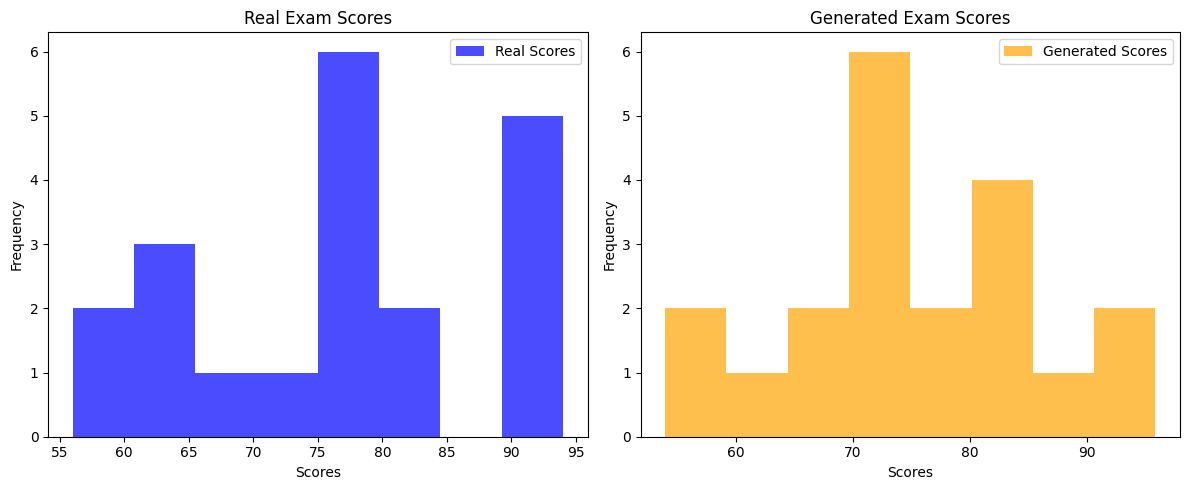

In [3]:
# Set seed for reproducibility
np.random.seed(42)

# Generate random exam scores from normal distribution with mean and std dev of original scores
random_scores = np.random.normal(loc=mean_score, scale=std_dev, size=20)

# Plot histograms side by side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(scores, bins=8, color='blue', alpha=0.7, label='Real Scores')
plt.title('Real Exam Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(random_scores, bins=8, color='orange', alpha=0.7, label='Generated Scores')
plt.title('Generated Exam Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
# Generate 100,000 samples from the normal distribution
samples = np.random.normal(loc=mean_score, scale=std_dev, size=100000)

# Calculate probability
prob_ge_75 = np.mean(samples >= 75)

print(f"Estimated Probability that a random student scores >= 75: {prob_ge_75:.4f}")

Estimated Probability that a random student scores >= 75: 0.5637


Null Hypothesis Mean: 94
T-statistic: -6.3894
P-value: 0.0000


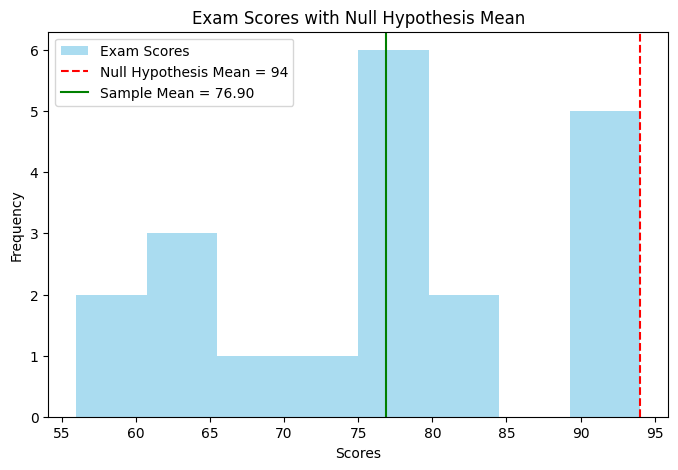

Reject the null hypothesis: The average exam score is significantly different from 94.


In [5]:
# Define null hypothesis mean
mu_null = 94

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(scores, mu_null)

print(f"Null Hypothesis Mean: {mu_null}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Plot for visualization
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=8, alpha=0.7, color='skyblue', label='Exam Scores')
plt.axvline(mu_null, color='red', linestyle='--', label=f'Null Hypothesis Mean = {mu_null}')
plt.axvline(mean_score, color='green', linestyle='-', label=f'Sample Mean = {mean_score:.2f}')
plt.title('Exam Scores with Null Hypothesis Mean')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The average exam score is significantly different from 94.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 94.")
